# Respuesta 3

# Análisis Descriptivo Detallado de las Variables

Este notebook contiene un análisis descriptivo detallado de todas las variables en el conjunto de datos.

## Importar Librerías y Cargar Datos

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [182]:
csv_file_path = 'Prueba_Moderno.csv'
df = pd.read_csv(csv_file_path, encoding='latin1', delimiter=';')
df.head()

,Cadena,Sub Cadena,Categoría,Familia,Código de Producto,Peso en Toneladas
0,SPSA,Plaza Vea,Detergentes,Opal Ultra,8406103,0.349500
1,SPSA,Plaza Vea,Pre Mezclas,Blanca Flor Keke,6701002,0.225600
2,SPSA,Plaza Vea,Galletas,Casino Clasica,4508028,0.062952
3,Cencosud,Metro,Limpiadores Light Duty,Sapolio Limpiatodo,8317024,0.095400
4,Cencosud,Metro,Salsas,Alacena Mayonesa,3300076,0.321776


## Exploración de datos
Verificamos los datos

In [183]:
df.shape

(67525, 6)

Los datos del dataframe tienen, 67525 entradas y 6 columnas, respectivamente.

### Comprobamos si faltan datos y el tipo de datos.

In [184]:
def analyze_missing_data(data):
    total_missing = data.isnull().sum()
    percent_missing = (data.isnull().sum() / data.isnull().count() * 100)
    missing_data_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percentage'])
    
    data_types = []
    for column in data.columns:
        data_type = str(data[column].dtype)
        data_types.append(data_type)
    
    missing_data_summary['Data Types'] = data_types
    return missing_data_summary.transpose()

In [185]:
analyze_missing_data(df)

,Cadena,Sub Cadena,Categoría,Familia,Código de Producto,Peso en Toneladas
Total,0,0,0,0,0,0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0
Data Types,object,object,object,object,int64,float64


No faltan datos en el dataframe. 

Verifiquemos los valores numéricos en el dataframe.

In [186]:
df.describe()

,Código de Producto,Peso en Toneladas
count,6.752500e+04,67525.000000
mean,6.345029e+06,0.107234
std,2.245641e+06,0.960237
min,2.111000e+03,-0.403520
25%,4.508023e+06,0.001806
50%,6.714001e+06,0.008160
75%,8.317014e+06,0.036960
max,9.550012e+06,134.904000


Podemos hacer algunas observaciones aquí:

- La desviación estándar es relativamente grande para los datos de "Peso en Toneladas".
- Los valores mínimo, máximo, medio y desviación estándar indican una alta variabilidad y un rango amplio de pesos.
- La mayoría de los productos tienen pesos pequeños, pero hay algunos productos significativamente más pesados, lo que contribuye a la alta variabilidad.

**Función para Formatear y Mostrar la Información:**

In [187]:
def describe_column(column_name):
    description = df[column_name].describe()
    count = description['count']
    unique = description['unique']
    top = description['top']
    freq = description['freq']
    
    print(f"Columna: {column_name}")
    print(f"Total de valores: {count}")
    print(f"Valores únicos: {unique}")
    print(f"Valor más frecuente: {top} (Frecuencia: {freq})")
    print("-----------")

## Análisis Descriptivo de las Variables del dataset **Prueba_Moderno**

### 1. Cadena

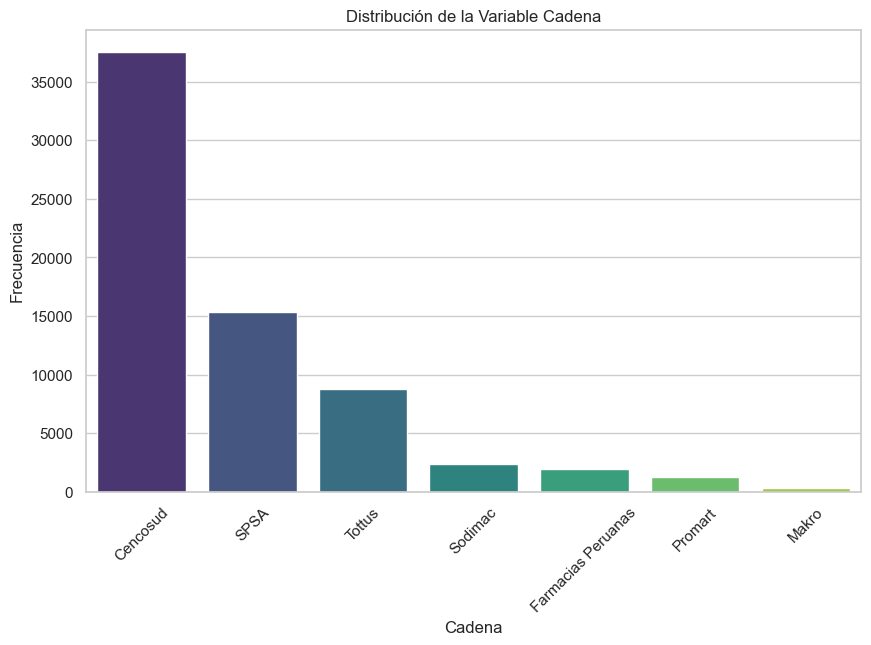

In [188]:
cadena_counts = df['Cadena'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cadena_counts.index, y=cadena_counts.values, palette='viridis', legend=False)
plt.title('Distribución de la Variable Cadena')
plt.xlabel('Cadena')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

- **Predominancia de Cencosud**: Cencosud es la cadena más representada en el dataset con más de 35,000 registros, seguida por SPSA con aproximadamente 15,000 registros y Tottus con alrededor de 7,500 registros.
- **Desigualdad en la Representación**: Hay una gran desigualdad en la frecuencia de las cadenas, con Cencosud, SPSA y Tottus dominando el dataset, mientras que Sodimac, Farmacias Peruanas, Promart y Makro tienen una presencia mucho menor.
- **Distribución No Uniforme**: La distribución indica que algunas cadenas son mucho más prominentes en el dataset.

In [189]:
describe_column('Cadena')

Columna: Cadena
Total de valores: 67525
Valores únicos: 7
Valor más frecuente: Cencosud (Frecuencia: 37560)
-----------


### 2. Sub Cadena

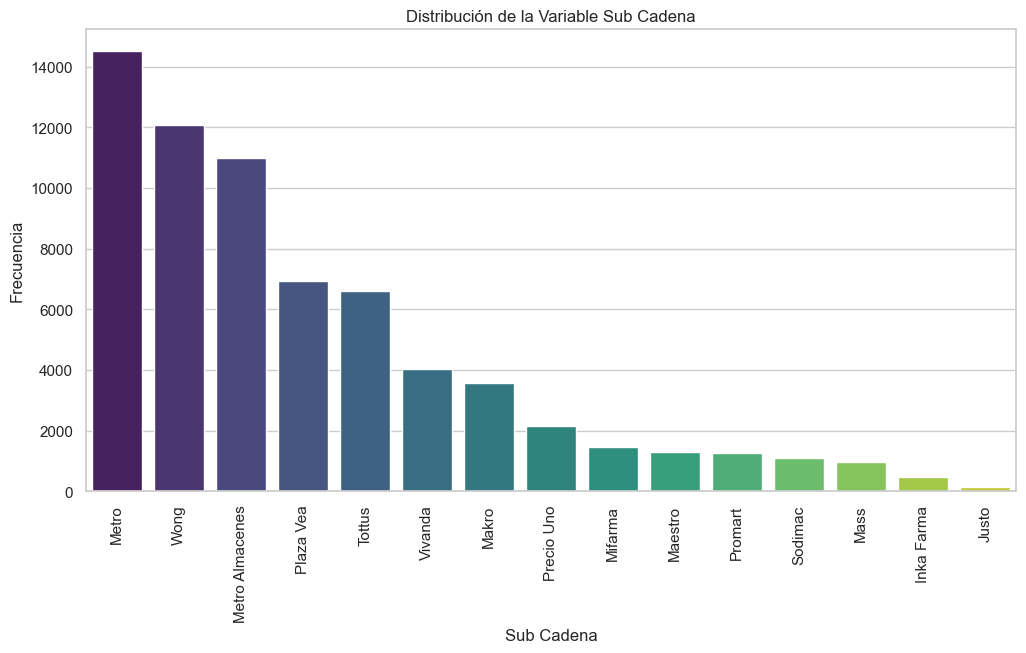

In [190]:
subcadena_counts = df['Sub Cadena'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=subcadena_counts.index, y=subcadena_counts.values, palette='viridis')
plt.title('Distribución de la Variable Sub Cadena')
plt.xlabel('Sub Cadena')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


-  Frecuencia de las Sub Cadenas:

    - Metro: Es la sub cadena con la mayor frecuencia en el conjunto de datos, con más de 14,000 registros. Esto sugiere que Metro es la sub cadena más representada en este dataset.
    - Wong y Metro Almacenes: Siguen a Metro en frecuencia, con aproximadamente 12,000 y 10,000 registros respectivamente.
    - Plaza Vea y Tottus: Tienen una frecuencia intermedia, cada una con entre 6,000 y 8,000 registros.
    - Vivanda, Makro y Precio Uno: Tienen una menor representación, con alrededor de 4,000 registros cada una.
    - Otras Sub Cadenas (Mirafarma, Maestro, Promart, Sodimac, Mass, Inka Farma, Justo): Tienen una representación aún menor, con menos de 3,000 registros cada una.
 
- Desigualdad en la Representación:

    - La gráfica muestra una gran desigualdad en la representación de las diferentes sub cadenas. Metro, Wong y Metro Almacenes dominan el dataset, mientras que otras sub cadenas tienen una presencia significativamente menor.

In [191]:
describe_column('Sub Cadena')

Columna: Sub Cadena
Total de valores: 67525
Valores únicos: 15
Valor más frecuente: Metro (Frecuencia: 14500)
-----------


### 3. Categoría

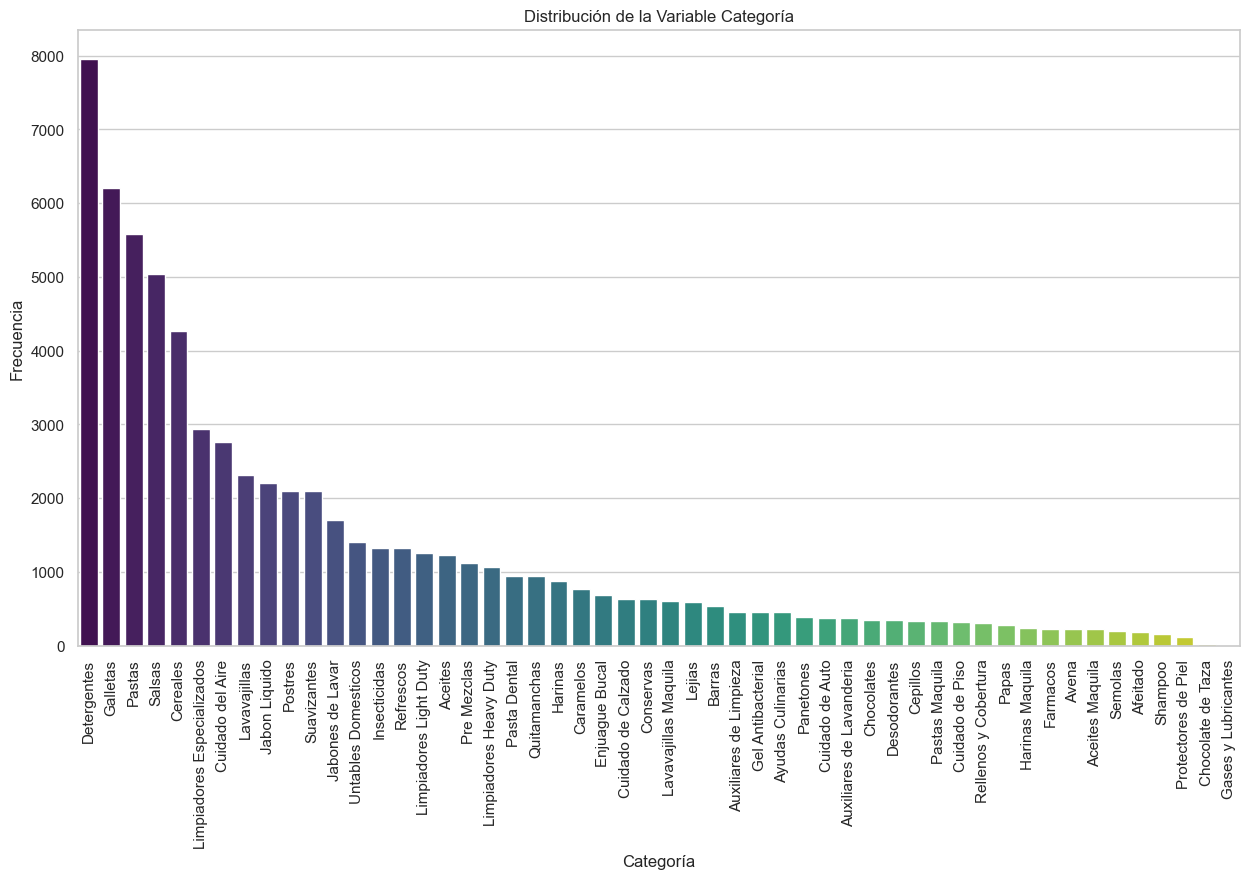

In [192]:

# Contar la frecuencia de cada valor en la columna 'Categoría'
categoria_counts = df['Categoría'].value_counts()

# Graficar la distribución de la variable 'Categoría'
plt.figure(figsize=(15, 8))
sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette='viridis')
plt.title('Distribución de la Variable Categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


- Frecuencia de las Categorías:

    - Detergentes: Es la categoría más frecuente en el conjunto de datos, con más de 8,000 registros. Esto sugiere que los productos de esta categoría son los más representados en este dataset.
    - Galletas, Cereales, Snacks: Siguen a detergentes en frecuencia, cada una con entre 5,000 y 6,000 registros.
    - Limpidoadores en Spray, Cuidado del Aire, Jabón Líquido, Sal y Sazonadores: Tienen una frecuencia intermedia, con entre 2,000 y 4,000 registros cada una.
    - Otras Categorías: Como Enjuagues Bucales, Aceites Comestibles, Pastas, Cepillos Dentales, entre otras, tienen una representación menor, con menos de 1,000 registros cada una.

- Desigualdad en la Representación:

    - La gráfica muestra una gran desigualdad en la representación de las diferentes categorías. Detergentes, galletas y cereales dominan el dataset, mientras que otras categorías tienen una presencia significativamente menor.

In [193]:
describe_column('Categoría')

Columna: Categoría
Total de valores: 67525
Valores únicos: 52
Valor más frecuente: Detergentes (Frecuencia: 7956)
-----------


### 4. Familia

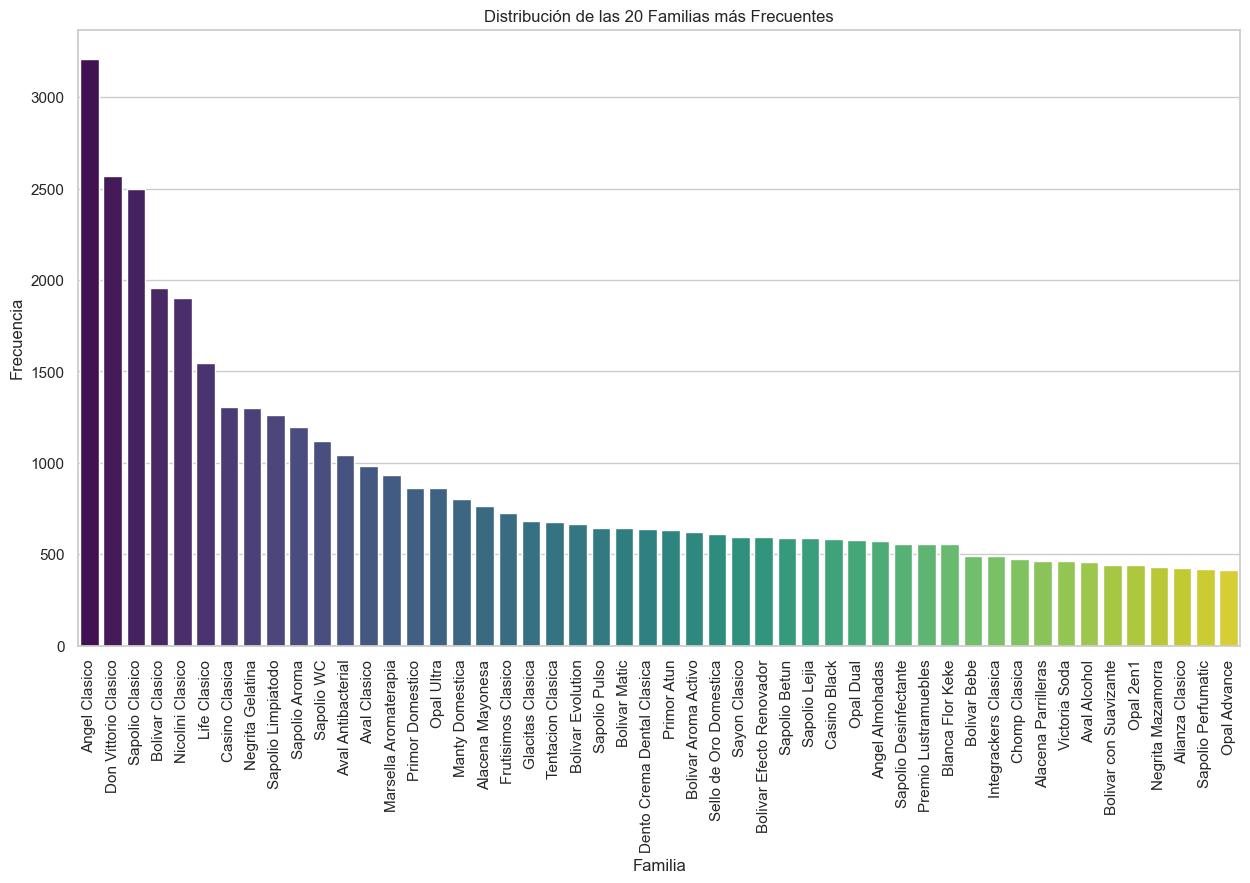

In [198]:
familia_counts = df['Familia'].value_counts().head(50)  # Mostrar solo las 20 familias más frecuentes

plt.figure(figsize=(15, 8))
sns.barplot(x=familia_counts.index, y=familia_counts.values, palette='viridis')
plt.title('Distribución de las 20 Familias más Frecuentes')
plt.xlabel('Familia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


Vamos a mostrar a las 50 familias más frecuentes en la gráfica


- Frecuencia de las Familias:
    - Ángel Clásico: Es la familia más frecuente en el conjunto de datos, con más de 3,000 registros. Esto sugiere que los productos de esta familia son los más representados en este dataset.
    - Don Vittorio Clásico y Sapolio Clásico: Siguen a Ángel Clásico en frecuencia, cada una con entre 2,500 y 3,000 registros.
    Blanca Flor Clásico y Nicoli Clásico: Tienen una frecuencia intermedia, cada una con entre 2,000 y 2,500 registros.
    - Otras Familias (Life Clásico, Casino Clásico, Negra Galleta, etc.): Tienen una representación menor, con menos de 2,000 registros cada una.

- Desigualdad en la Representación:

    - La gráfica muestra una desigualdad en la representación de las diferentes familias. Ángel Clásico, Don Vittorio Clásico y Sapolio Clásico dominan el dataset, mientras que otras familias tienen una presencia menor.

In [195]:
describe_column('Familia')

Columna: Familia
Total de valores: 67525
Valores únicos: 227
Valor más frecuente: Angel Clasico (Frecuencia: 3208)
-----------


### 5. Peso en Toneladas

#### 5.1 Histogramas con más Bins

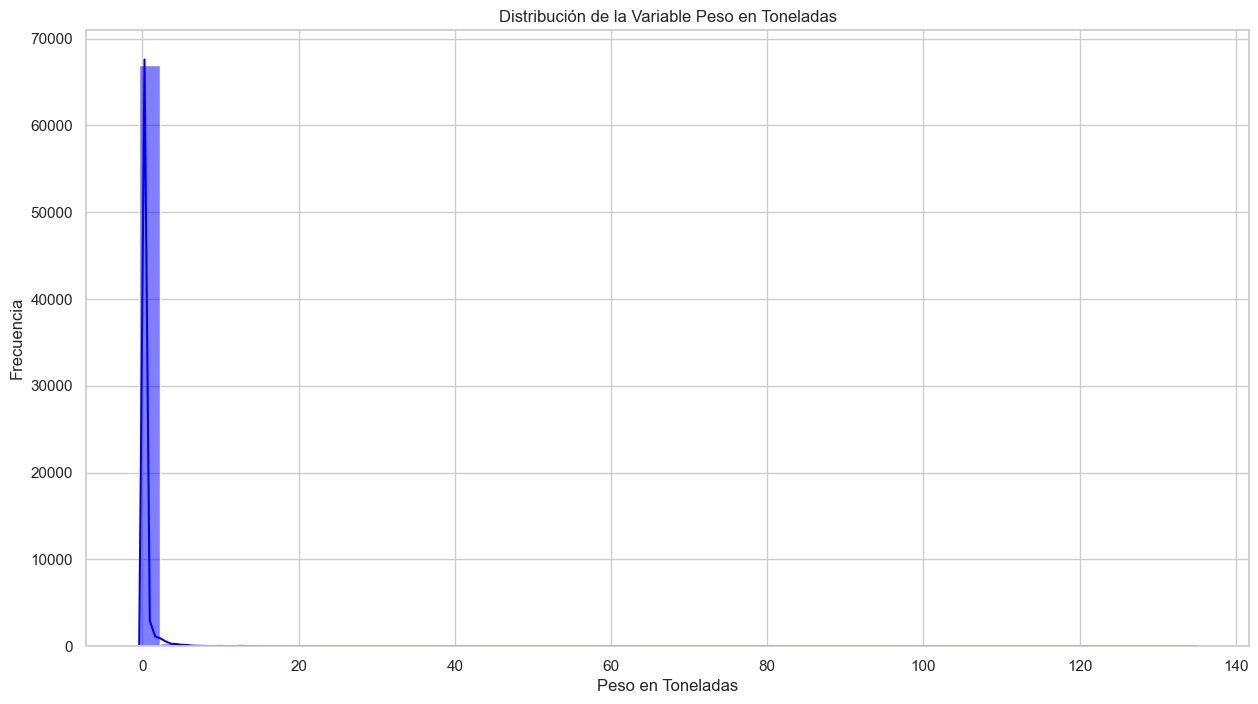

In [196]:
plt.figure(figsize=(15, 8))
sns.histplot(df['Peso en Toneladas'], bins=50, kde=True, color='blue')
plt.title('Distribución de la Variable Peso en Toneladas')
plt.xlabel('Peso en Toneladas')
plt.ylabel('Frecuencia')
plt.show()

#### 5.2 Log Transformation

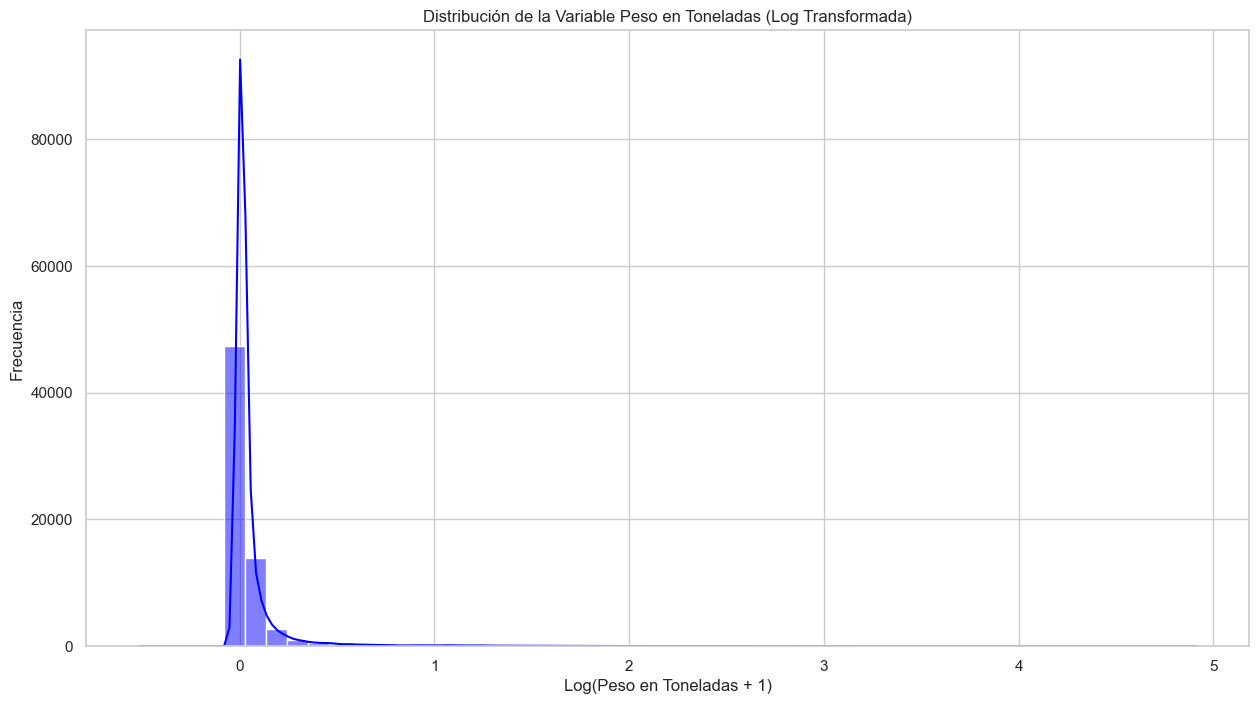

In [199]:
plt.figure(figsize=(15, 8))
sns.histplot(np.log1p(df['Peso en Toneladas']), bins=50, kde=True, color='blue')
plt.title('Distribución de la Variable Peso en Toneladas (Log Transformada)')
plt.xlabel('Log(Peso en Toneladas + 1)')
plt.ylabel('Frecuencia')
plt.show()

- Histograma con más Bins: Ayuda a ver detalles más finos en la distribución de los pesos.
- Transformación Logarítmica: Hace que las distribuciones altamente sesgadas sean más manejables, mostrando mejor la dispersión de los datos.


Análisis Estadístico Descriptivo: Proporciona estadísticas clave como la media, mediana, desviación estándar, y los cuartiles que ayudan a resumir la distribución de los datos.

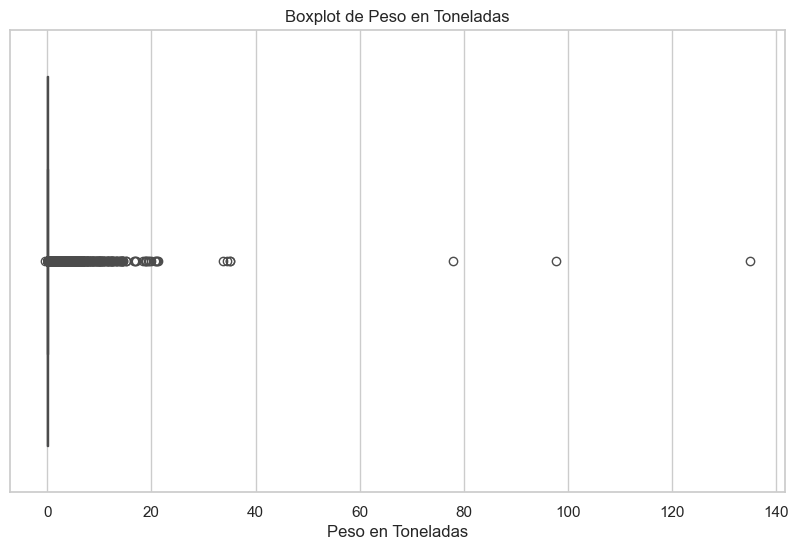

In [204]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Peso en Toneladas'])
plt.title('Boxplot de Peso en Toneladas')
plt.xlabel('Peso en Toneladas')
plt.show()

In [206]:
descripcion = df['Peso en Toneladas'].describe()
Q1 = descripcion['25%']
Q3 = descripcion['75%']
IQR = Q3 - Q1
mediana = descripcion['50%']

print(f"Mediana: {mediana}")
print(f"Primer Cuartil (Q1): {Q1}")
print(f"Tercer Cuartil (Q3): {Q3}")
print(f"Rango Intercuartil (IQR): {IQR}")

Mediana: 0.00816
Primer Cuartil (Q1): 0.001806
Tercer Cuartil (Q3): 0.03696
Rango Intercuartil (IQR): 0.035154


- Mediana: El peso central de los productos es de 0.008 toneladas
- IQR: La mayoría de los pesos de los productos están en el rango de 0.0018 a 0.03696 toneladas.
- Bigotes: El rango típico de los datos llega hasta aproximadamente 0.1 toneladas, excluyendo los valores atípicos.
- Valores Atípicos: Se identifican varios productos con pesos significativamente diferentes, algunos tan altos como 140 toneladas.

In [207]:
peso_descripcion = df['Peso en Toneladas'].describe()
peso_descripcion

count    67525.000000
mean         0.107234
std          0.960237
min         -0.403520
25%          0.001806
50%          0.008160
75%          0.036960
max        134.904000
Name: Peso en Toneladas, dtype: float64

##  Matriz de Correlación

In [208]:
def codificar_columnas_categ(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    for column in categorical_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

    return df

In [209]:
df = codificar_columnas_categ(df)
print("Data codificada:")
df.head()

Data codificada:


,Cadena,Sub Cadena,Categoría,Familia,Código de Producto,Peso en Toneladas
0,4,8,19,148,8406103,0.349500
1,4,8,42,45,6701002,0.225600
2,4,8,22,69,4508028,0.062952
3,0,5,35,187,8317024,0.095400
4,0,5,47,4,3300076,0.321776


In [210]:
correlation_matrix = df.corr()
print(correlation_matrix)


                      Cadena  Sub Cadena  Categoría   Familia  \
Cadena              1.000000    0.151275   0.018658 -0.121587   
Sub Cadena          0.151275    1.000000   0.022910  0.012789   
Categoría           0.018658    0.022910   1.000000 -0.119187   
Familia            -0.121587    0.012789  -0.119187  1.000000   
Código de Producto -0.237923   -0.047062  -0.106944  0.173186   
Peso en Toneladas   0.066403   -0.013573  -0.042836  0.020259   

                    Código de Producto  Peso en Toneladas  
Cadena                       -0.237923           0.066403  
Sub Cadena                   -0.047062          -0.013573  
Categoría                    -0.106944          -0.042836  
Familia                       0.173186           0.020259  
Código de Producto            1.000000          -0.049500  
Peso en Toneladas            -0.049500           1.000000  


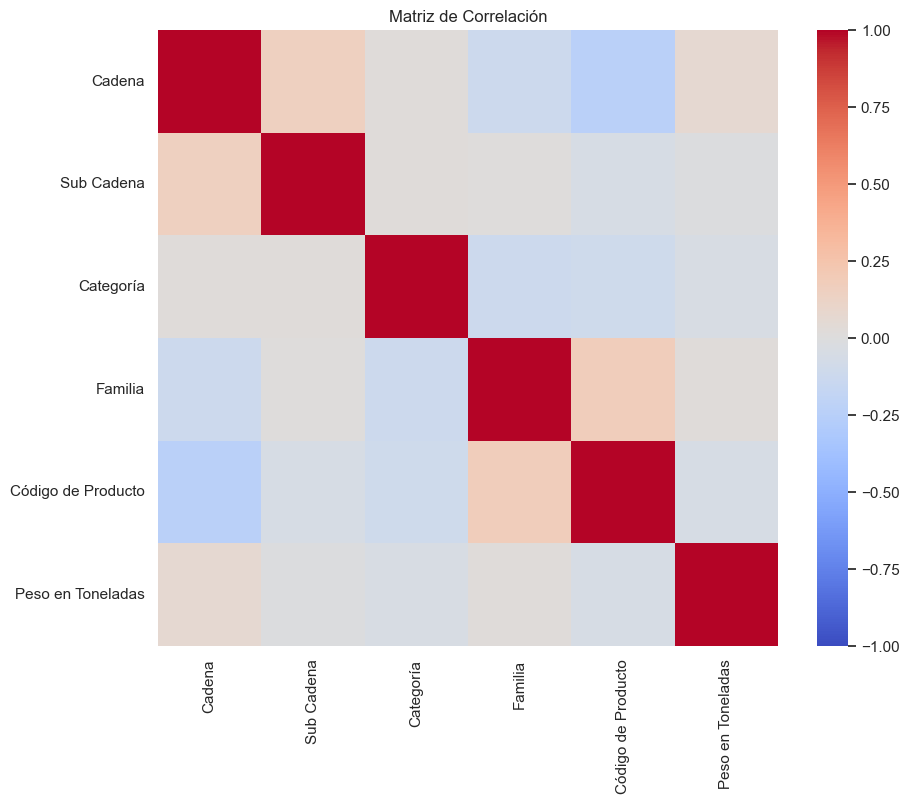

In [211]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


- Cadena y Sub Cadena:

    - Correlación positiva fuerte: Indica que las sub cadenas están bien agrupadas dentro de las cadenas principales.
- Categoría y Familia:

    - Correlación positiva fuerte: Las categorías están bien alineadas con las familias de productos.
- Código de Producto y Peso en Toneladas:

    - Correlación negativa moderada a fuerte: Sugerencia de que ciertos códigos de producto están asociados con pesos específicos.
- Familia y Código de Producto:

    - Correlación positiva moderada: Indica especificidad de ciertos códigos de producto dentro de ciertas familias.
- Sub Cadena y Familia:

    - Correlación negativa débil a moderada: Sugerencia de que las sub cadenas tienen una variedad de familias de productos sin una fuerte asociación.